In [1]:
# Notebook created by Samuel Z.
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

# ANALYSIS

In [3]:
data_set = pd.read_csv("custom/custom_v8_objects.csv")

In [4]:
data_set[(data_set.num_type == 2)].sort_values("num_user_created_objs")

,num_user_created_objs,num_type,total_count_of_type
1,1,2,2
184,2,2,2
367,3,2,2
550,4,2,2
733,5,2,2
916,6,2,2
1099,7,2,2
1282,8,2,2
1465,9,2,2
1648,10,2,3


# Looking at correlation for each num_type

In [5]:
# print(data_set['num_type'].max())
for num_type in data_set['num_type'].unique():
#     print(num_type)
    check_corr = data_set[(data_set.num_type == num_type)].sort_values("num_user_created_objs")
    # remove GC'ed data so we can have better correlation
    check_corr = check_corr[(check_corr.num_user_created_objs != 1) & (check_corr.num_user_created_objs != 7)]
    
    check_X = check_corr['num_user_created_objs']
    check_Y = check_corr['total_count_of_type']
    
    corr_of_type = check_X.corr(check_Y)
    if pd.isna(corr_of_type): # don't care if it doesn't have correlation
        continue
    
    print(f"Instance Type: {num_type} correlation: {corr_of_type}")
    

Instance Type: 2 correlation: 0.5747175593066843
Instance Type: 8 correlation: 0.9909311150105358
Instance Type: 10 correlation: 0.5747175593066843
Instance Type: 32 correlation: 0.5747175593066843
Instance Type: 33 correlation: 0.5747175593066843
Instance Type: 35 correlation: 0.5747175593066843
Instance Type: 37 correlation: 0.5747175593066843
Instance Type: 40 correlation: 0.8145785538004572
Instance Type: 41 correlation: 0.9938502186521428
Instance Type: 42 correlation: 0.5747175593066843
Instance Type: 45 correlation: -0.2612352542303111
Instance Type: 50 correlation: -0.2612352542303111
Instance Type: 58 correlation: 0.5747175593066843
Instance Type: 64 correlation: 0.5747175593066843
Instance Type: 65 correlation: 0.5747175593066843
Instance Type: 66 correlation: 0.2960666214610192
Instance Type: 67 correlation: 0.5747175593066844
Instance Type: 76 correlation: 0.9069772898910238
Instance Type: 77 correlation: 0.5747175593066843
Instance Type: 84 correlation: 0.47455886102636724

In [6]:
data_set.describe()

,num_user_created_objs,num_type,total_count_of_type
count,1830.000000,1830.000000,1830.000000
mean,5.500000,350.918033,251.671038
std,2.873066,416.117885,790.068666
min,1.000000,0.000000,1.000000
25%,3.000000,91.000000,2.000000
50%,5.500000,137.000000,2.000000
75%,8.000000,1040.000000,50.000000
max,10.000000,1092.000000,6069.000000


# Data Viz

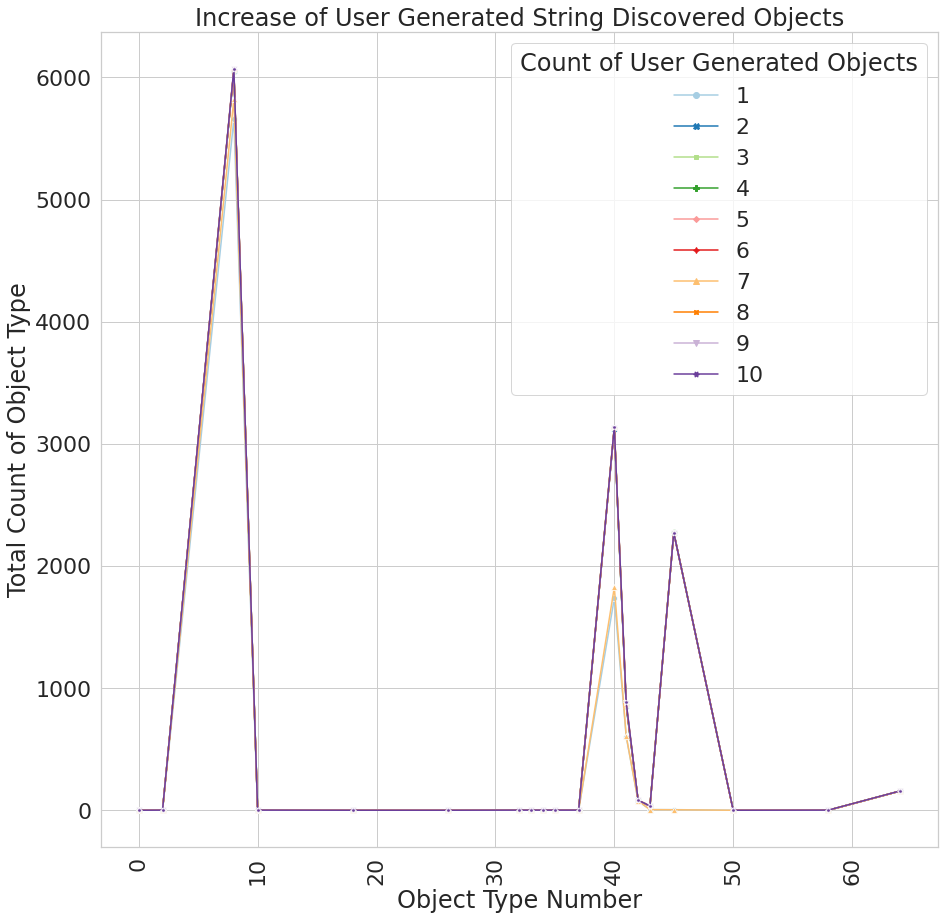

In [30]:
import matplotlib.ticker as ticker

# all str types
str_types = np.array([0, 2, 8, 10, 18, 26, 32, 33, 34, 35, 37, 40, 41, 42, 43, 45, 50, 58, 64])

# modify total count of type to see lower values and how they are.
modified_data = data_set[data_set.num_type < 65]
# modified_data = data_set

plt.figure(figsize=(15, 15))
sns.set(style="whitegrid", font_scale=2)
lpot = sns.lineplot(x="num_type", y="total_count_of_type", hue="num_user_created_objs", style="num_user_created_objs", 
             markers=True, dashes=False,   data=modified_data, legend="full", palette='Paired')

lpot.legend(title='Count of User Generated Objects', loc='upper right')
lpot.set_title("Increase of User Generated String Discovered Objects")

plt.xlabel("Object Type Number")
plt.ylabel("Total Count of Object Type")
# plt.xticks(str_types)
plt.xticks(rotation=90)

plt.show()

In [5]:
const_one_byte = data_set[(data_set.num_type == 0x421)].sort_values('num_user_created_objs')

const_one_byte

,num_user_created_objs,num_type,total_count_of_type
152,1,1057,2695
335,2,1057,4871
518,3,1057,4717
701,4,1057,4741
884,5,1057,4870
1067,6,1057,4870
1250,7,1057,2795
1433,8,1057,4749
1616,9,1057,4870
1799,10,1057,4720


In [6]:
user_created = data_set[(data_set.num_type == 0x421)].sort_values('num_user_created_objs')
user_created

,num_user_created_objs,num_type,total_count_of_type
152,1,1057,2695
335,2,1057,4871
518,3,1057,4717
701,4,1057,4741
884,5,1057,4870
1067,6,1057,4870
1250,7,1057,2795
1433,8,1057,4749
1616,9,1057,4870
1799,10,1057,4720


In [31]:
# x = data_set['num_user_created_objs']
# y = data_set['total_count_of_type']

correlate_user_created = data_set[(data_set.num_type == 0x421)].sort_values('num_user_created_objs')
correlate_user_created = correlate[correlate.total_count_of_type > 3000]
x_corr_user_created = correlate['num_user_created_objs']
y_corr_user_created  = correlate['total_count_of_type']

# correlate
x_corr_user_created.corr(y_corr_user_created)

0.9938502186521428

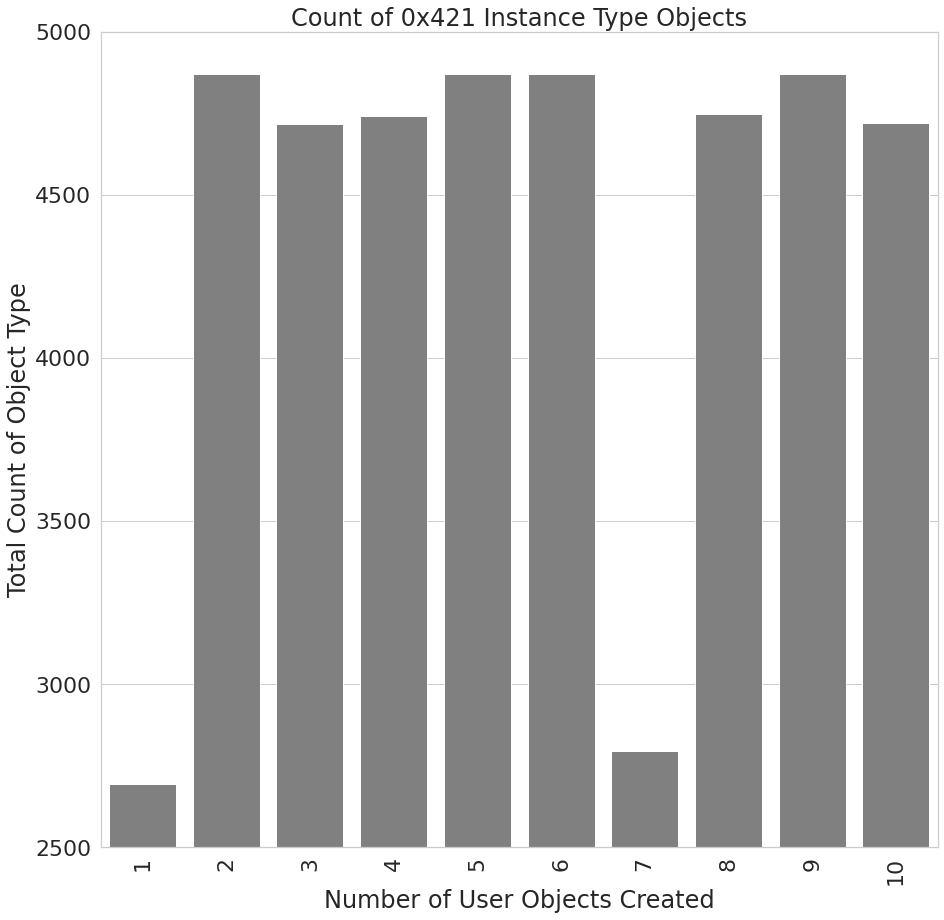

In [42]:
plt.figure(figsize=(15, 15))
lpot = sns.barplot(x="num_user_created_objs", 
            y="total_count_of_type",
            data=user_created,color='grey')
lpot.set_ylim(2500, 5000)
plt.xlabel("Number of User Objects Created")
lpot.set_title("Count of 0x421 Instance Type Objects")

plt.ylabel("Total Count of Object Type")
plt.xticks(rotation=90)
plt.show()

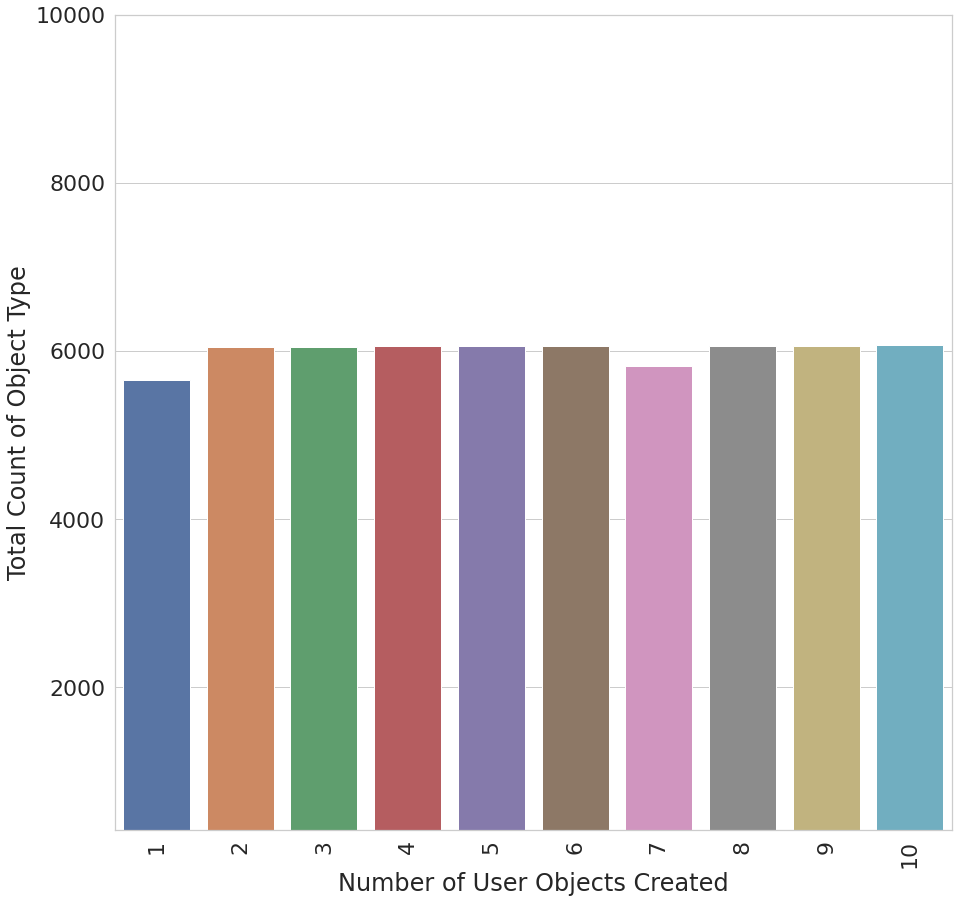

In [43]:
# showing specific type of constant one byte str 
# example of constant one byte str type

plt.figure(figsize=(15, 15))
lpot = sns.barplot(x="num_user_created_objs", 
            y="total_count_of_type",
            data=const_one_byte)
lpot.set_ylim(300, 10000)
plt.xlabel("Number of User Objects Created")
plt.ylabel("Total Count of Object Type")
plt.xticks(rotation=90)
plt.show()

In [24]:
# ONE_BYTE_INTERNALIZED_STRING_TYPE         
one_byte_internalized = data_set[(data_set.num_type == 8)].sort_values('num_user_created_objs')
one_byte_internalized

,num_user_created_objs,num_type,total_count_of_type
2,1,8,5659
185,2,8,6052
368,3,8,6054
551,4,8,6056
734,5,8,6058
917,6,8,6058
1100,7,8,5823
1283,8,8,6064
1466,9,8,6066
1649,10,8,6069


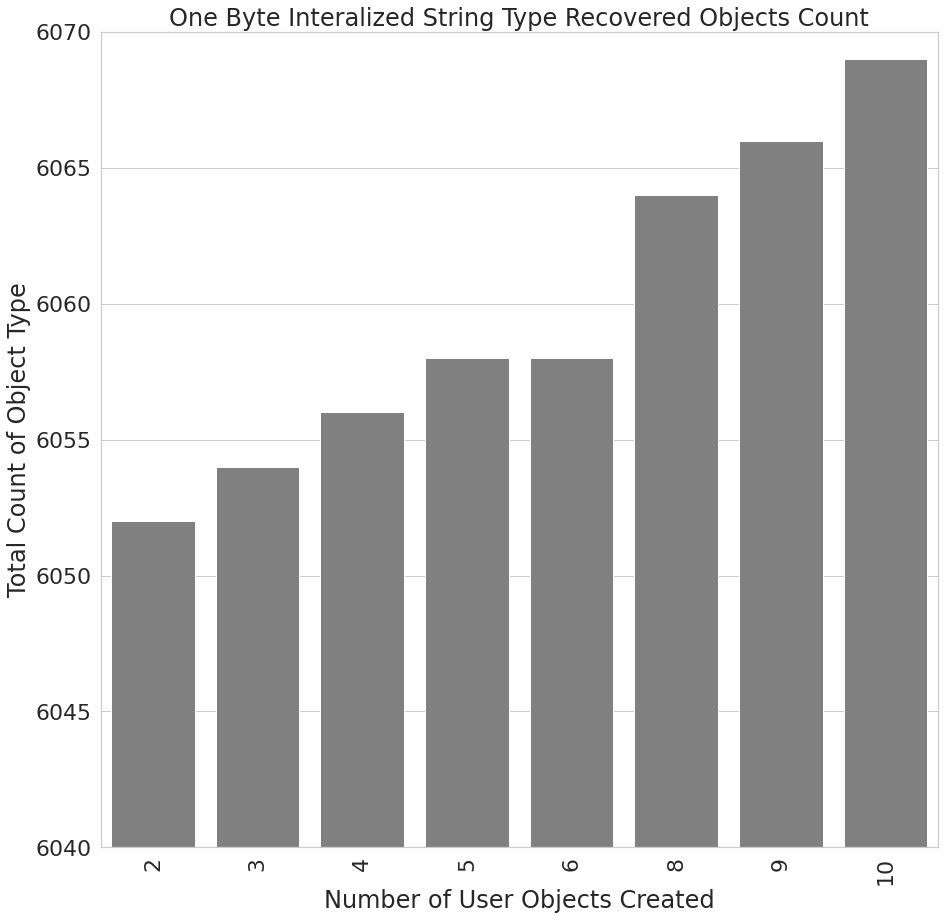

In [44]:
# ONE_BYTE_INTERNALIZED_STRING_TYPE                

custom_data = one_byte_internalized[(one_byte_internalized.num_user_created_objs != 1) & (one_byte_internalized.num_user_created_objs != 7)]

plt.figure(figsize=(15, 15))
lpot = sns.barplot(x="num_user_created_objs", 
            y="total_count_of_type",
            data=custom_data, color='grey')
lpot.set_ylim(6040, 6070)
plt.xlabel("Number of User Objects Created")
plt.ylabel("Total Count of Object Type")

lpot.set_title("One Byte Interalized String Type Recovered Objects Count")
# lpot.set_title("Count of 0x421 Instance Type Objects")
plt.xticks(rotation=90)

# ax = ax.set_ylim(5000, 7000)
plt.show()

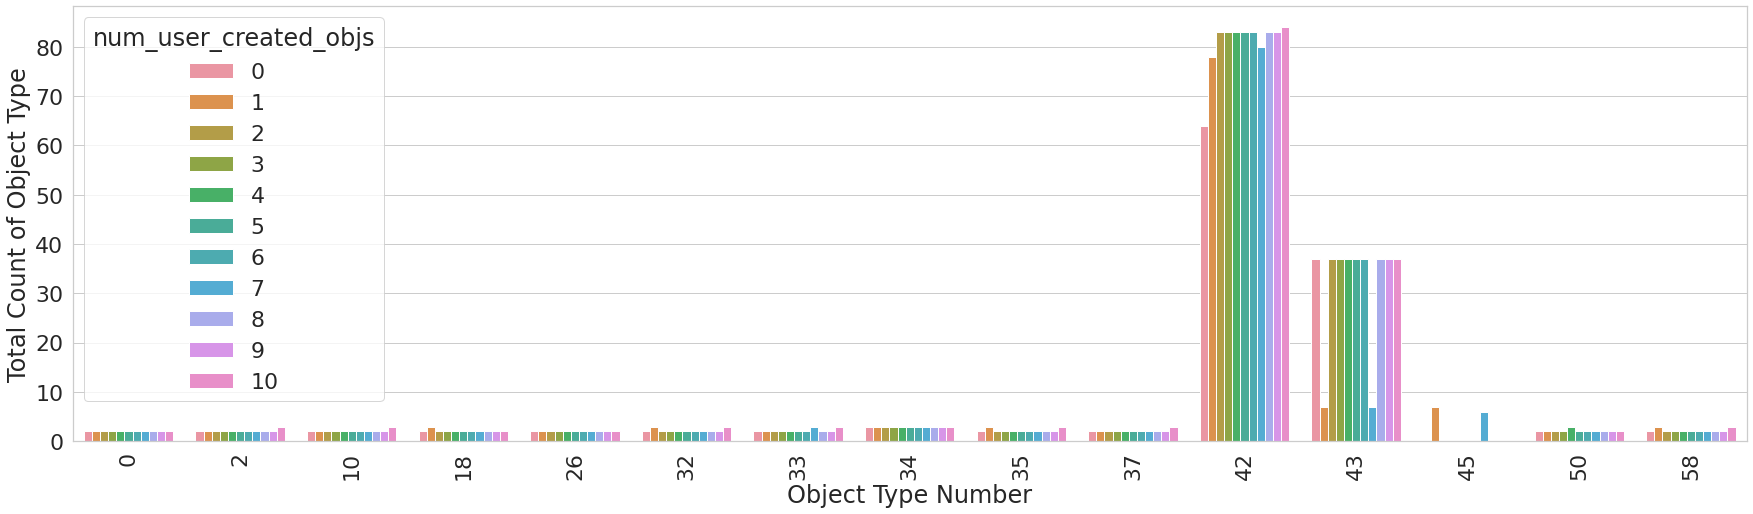

In [37]:
# fool around with the data here to see what it looks like
# can't really do great analysis by looking at all the values at same time
str_data = data_set[data_set.num_type < 64]
str_data = str_data[str_data.total_count_of_type < 100]
# str_data = str_data[(str_data.num_type != 40) & (str_data.num_type != 41) & (str_data.num_type != 42) & (str_data.num_type != 43)]
# str_data = str_data[str_data.num_user_created_objs < ]

plt.figure(figsize=(30, 8))
lpot = sns.barplot(x="num_type", 
            y="total_count_of_type", 
            hue="num_user_created_objs", 
            data=str_data)
plt.xlabel("Object Type Number")
plt.ylabel("Total Count of Object Type")
plt.xticks(rotation=90)
plt.show()